In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy as sp 
import pygimli as pg
from pygimli.physics import ert
import matplotlib.pyplot as plt

## Nov 24

In [24]:
file_path = 'Surveys/nov24_pygimli.dat'

with open(file_path, 'r') as file:
    lines = file.readlines()

header_line = lines[60].strip()
header_columns = header_line.split() 
header_columns = header_columns[1:]  # Excluding the first element, which is '#'

df = pd.read_csv(file_path, sep='\t', comment='#', header=None, skiprows=61, names=header_columns)
df = df.apply(pd.to_numeric, errors='coerce')

In [25]:
df

,a,b,m,n,err,i,ip,iperr,k,r,rhoa,u,valid
0,1,4.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,57.690006,0.0,1.0
1,2,5.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,231.347763,0.0,1.0
2,3,6.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,228.274719,0.0,1.0
3,4,7.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,207.114761,0.0,1.0
4,5,8.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,245.312836,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,11,50.0,31.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1466.777588,0.0,1.0
495,12,51.0,32.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,862.716614,0.0,1.0
496,14,53.0,34.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,84.570915,0.0,1.0
497,22,57.0,39.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,43.032196,0.0,1.0


<Axes: ylabel='rhoa'>

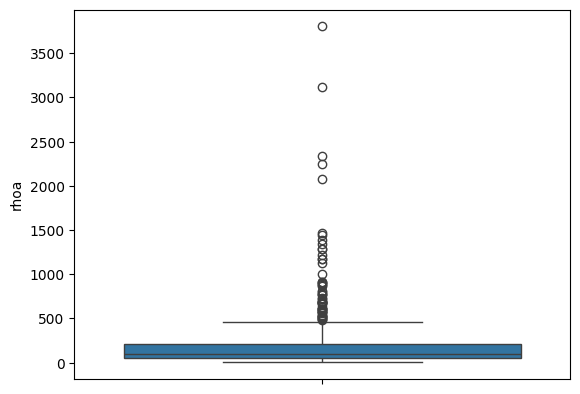

In [35]:
sns.boxplot(df['rhoa'])

In [26]:
threshold_rhoa = df['rhoa'].quantile(0.99)
threshold_rhoa

1484.9406103508834

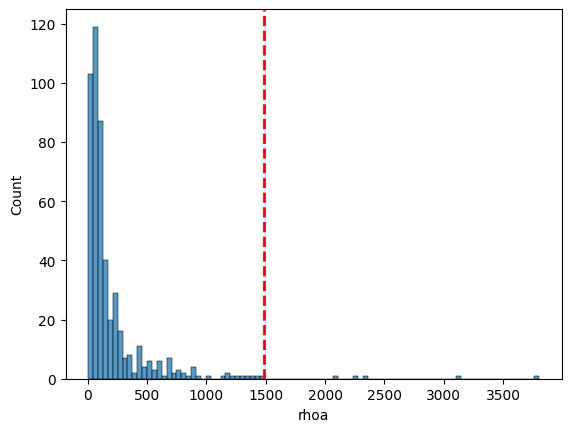

In [28]:
sns.histplot(df['rhoa'])
plt.axvline(threshold_rhoa, color='red', linestyle='--', linewidth=2, label='99th percentile threshold')

In [29]:
# Filtering the DataFrame to exclude rows where 'rhoa' is above the threshold
df_filtered = df[df['rhoa'] <= threshold_rhoa]

# Displaying the first few rows of the DataFrame after filtering and the number of remaining rows
filtered_data_sample = df_filtered.head()
remaining_rows = df_filtered.shape[0]

(filtered_data_sample, remaining_rows)

(   a    b    m    n  err    i   ip  iperr    k    r        rhoa    u  valid
 0  1  4.0  2.0  3.0  0.0  0.0  0.0    0.0  0.0  0.0   57.690006  0.0    1.0
 1  2  5.0  3.0  4.0  0.0  0.0  0.0    0.0  0.0  0.0  231.347763  0.0    1.0
 2  3  6.0  4.0  5.0  0.0  0.0  0.0    0.0  0.0  0.0  228.274719  0.0    1.0
 3  4  7.0  5.0  6.0  0.0  0.0  0.0    0.0  0.0  0.0  207.114761  0.0    1.0
 4  5  8.0  6.0  7.0  0.0  0.0  0.0    0.0  0.0  0.0  245.312836  0.0    1.0,
 493)

<Axes: ylabel='rhoa'>

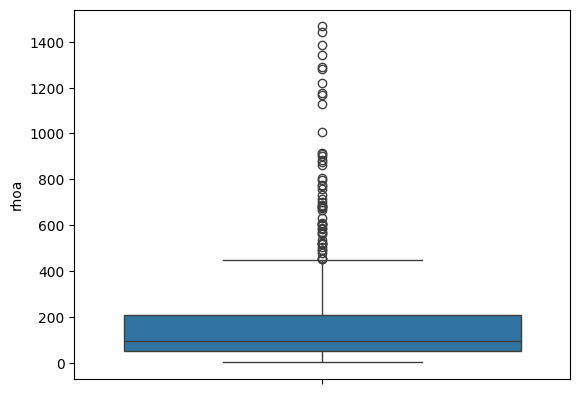

In [36]:
sns.boxplot(df_filtered['rhoa'])